In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from pyrlap.algorithms.hierarchicalqlearning import HierarchicalQLearner
from pyrlap.domains.taxicab.vis import animate_transitions
from pyrlap.domains.taxicab import simple_getput

np.random.seed(0)

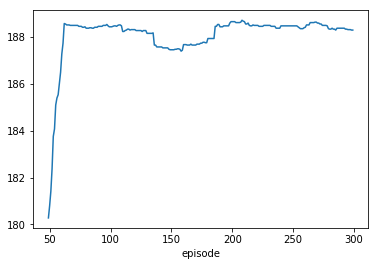

In [2]:
learner = HierarchicalQLearner(simple_getput,
                               learning_rate=.9,
                               discount_rate=.99,
                               initial_qvalue=0)
run_data = learner.train(episodes=300, max_choice_steps=100)
run_data = pd.DataFrame(run_data)
rolling = run_data.groupby('episode')['r'].sum().rolling(50)
rolling.mean().plot()

In [3]:
s = learner.ham.get_init_state()
print(learner._qvals(s))
print(learner._completion_qs(s))
print(learner._action_qs(s))
print(learner._external_qs(s))

{('get', (('passenger_i', 0),)): 175.11392524559176, ('get', (('passenger_i', 1),)): 167.4737229999967, ('put', ()): -999999824.4142174}
{('get', (('passenger_i', 0),)): 177.10392524559177, ('get', (('passenger_i', 1),)): 170.4582624568489, ('put', ()): 175.58578264239637}
{('get', (('passenger_i', 0),)): -1.99, ('get', (('passenger_i', 1),)): -2.9845394568522035, ('put', ()): -1000000000}
{('get', (('passenger_i', 0),)): 0.0, ('get', (('passenger_i', 1),)): 0.0, ('put', ()): 0.0}


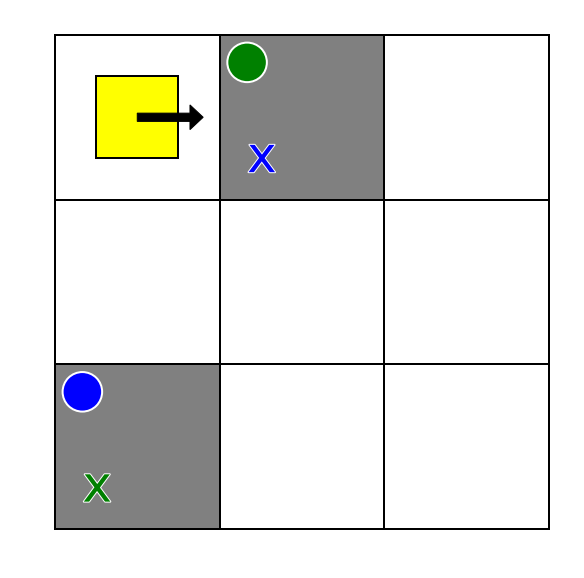

In [4]:
traj = learner.run()
ani = animate_transitions(learner.ham.mdp, traj, 
                          'simple_getput.mp4', 
                          move_interval=750)